<h1><center>Trabajo Práctico 2</center></h1>

## Imports

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# %% Cargar datos
carpeta = 'C:/Users/nicow/Desktop/Facultad/LaboDeDatos/LaboDatos_TP2/'
# un array para las imágenes, otro para las etiquetas (por qué no lo ponen en el mismo array #$%@*)
data_imgs = np.load(carpeta+'mnistc_images.npy')
data_chrs = np.load(carpeta+'mnistc_labels.npy')[:, np.newaxis]

## Cuáles parecen ser los atributos (i.e., píxeles) más relevantes para predecir el dígito al que corresponde la imagen? ¿Cuáles no? ¿Creen que se pueden descartar atributos

Para responder a esta pregunta lo que hicimos fue calcular la desviación estandar de cada pixel, primero hicimos el promedio de cada conjunto de clases (digitos) y luego un promedio general con respecto a estas 10 matrices, luego calculamos la desviacion estandar para cada pixel tomando como datos los valores de los promedios de cada digito en la misma posición del pixel.
Se puede observar que algunos valores de la zona del centro son los mas importantes para diferenciar entre numeros ya que la desviación estandar es más alta, por lo tanto hay una mayor variación de valores, por el contrario en la periferia y algunas partes del centro hay desviación estandar muy baja por lo tanto no son datos tan clave para identificar numeros.

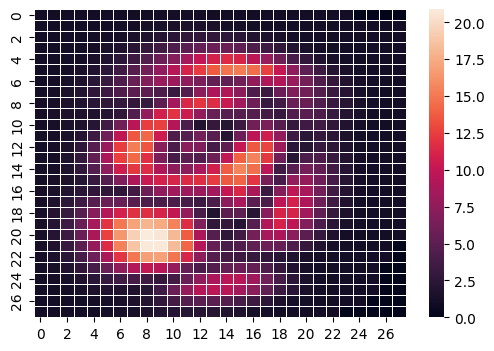

In [93]:

#Defino 10 matrices distintas, una por digito, donde voy a sumar todas las imagenes respectivas al conjunto
cero = np.zeros((28,28),float)
uno = np.zeros((28,28),float)
dos = np.zeros((28,28),float)
tres = np.zeros((28,28),float)
cuatro = np.zeros((28,28),float) 
cinco = np.zeros((28,28),float)
seis = np.zeros((28,28),float) 
siete = np.zeros((28,28),float) 
ocho = np.zeros((28,28),float) 
nueve = np.zeros((28,28),float)
#Creo una lista de matrices donde voy a tener el  promedio de valor de pixel por cada pixel de clase de digito
promedios = [cero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve]
#defino matriz vacia para construir el promedio de todos los digitos juntos, la desviacion estandar y una lista donde pondre la cantidad de elementos por digito
promedio_general = np.zeros((28,28),float)
desviacion = np.zeros((28,28),float)
contador = np.zeros(10)
#Hago iteraciones para sumar los digitos en su matriz designada para promedio correspondiente y sumo al contador tambieb
for i in range(0,len(data_imgs)):
    promedios[data_chrs[i].item()] += (data_imgs[i,:,:,0])
    contador[data_chrs[i].item()] += 1
#divido por 10 y el promedio estaria listo
for j in range(0,10):
    promedios[j] = promedios[j]/contador[j]
    promedio_general += promedios[j]/10

#Aplico formula de desviacion estandar para cada digito para cada promedio y sumo luego 
for n in range(0,10):
    for j in range(0,28):
        for k in range(0,28):
            desviacion[j][k] += pow(promedios[n][j][k] - promedio_general[j][k],2)/10
            desviacion[j][k] = np.sqrt(desviacion[j][k])
ax = sns.heatmap(desviacion , linewidth=0.5)
plt.show()

## Hay dígitos que son parecidos entre sí? Por ejemplo, ¿qué es más fácil de diferenciar: las imágenes correspondientes a los dígitos 0 y 1, ó las imágenes de 5 y 6?

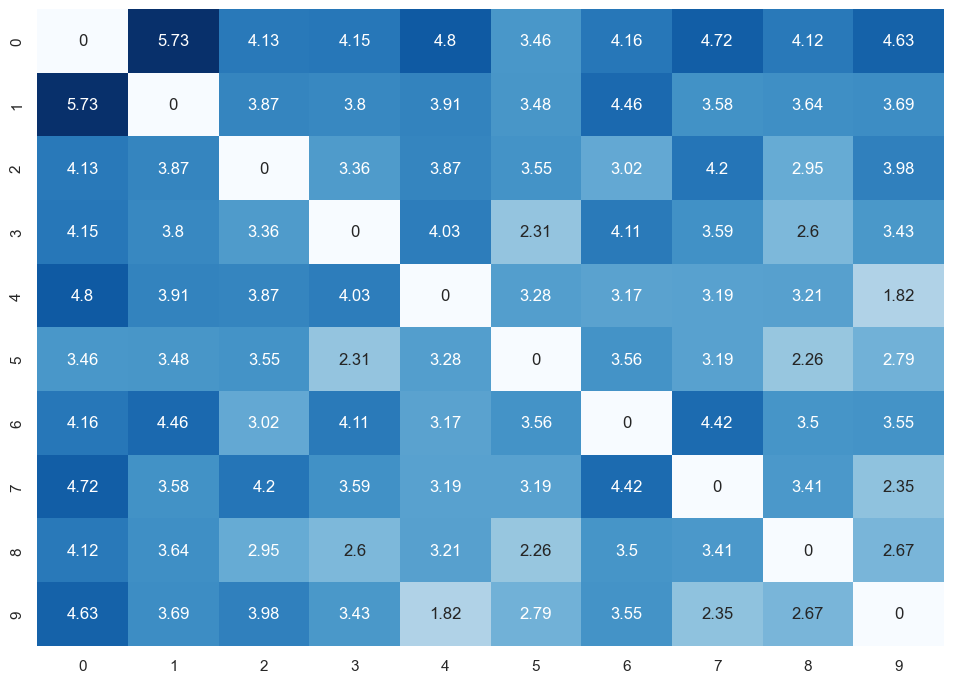

In [111]:
data = np.zeros((10,10),float)

#calculo la norma de la resta de dos promedios, para saber que tan parecidos son dos clases, ya que mientras mas se parece la norma de la resta tiende a 0, 
for i in range(0,10):
    for j in range(0,10):
        data[i][j] = np.linalg.norm(promedios[i]/256 - promedios[j]/256)
df = pd.DataFrame(data)

# Lo que imprimo es una matriz de comparacion, donde mientras mayor sea el numero,menos se parecen las clases 
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df,xticklabels=[0,1,2,3,4,5,6,7,8,9],yticklabels=[0,1,2,3,4,5,6,7,8,9], annot=True, fmt='.3g', cmap='Blues', cbar=False)
plt.show()

En este punto nos vamos a tener un enfoque más matematico, como la imagen es una matriz de numeros que representan la intensidad del pixel, vamos a restar los promedios hechos en el punto anterior y calcular la norma de la matriz resultante, si se parecen mucho los digitos (matrices promedio) van a tener una norma baja ya que al cancelarse valores la norma tiende a cero mientras más se asemejen las matrices y por el contrario mientras más distintas sean las imagenes la norma va a crecer.
Dado los resultados podemos ver que efectivamente hay digitos más dificiles de distinguir como el 4 y el 9 o el 5 y el 8, por el contrario hay digitos que son más faciles de distinguir como el 0 y el 1 o el 0 y el 4.

# Tomen una de las clases, por ejemplo el dígito 7. ¿Son todas las imágenes muy similares entre sí?

Si se calcula la desviación estandar por pixel, por ejemplo del 4, se puede ver que hay mucha variacion en el centro, donde la mayoría de dibujos estan hechos, por lo tanto se podría decir que no, las imagenes varian bastantes unas de otras, ya sea en forma o posición.

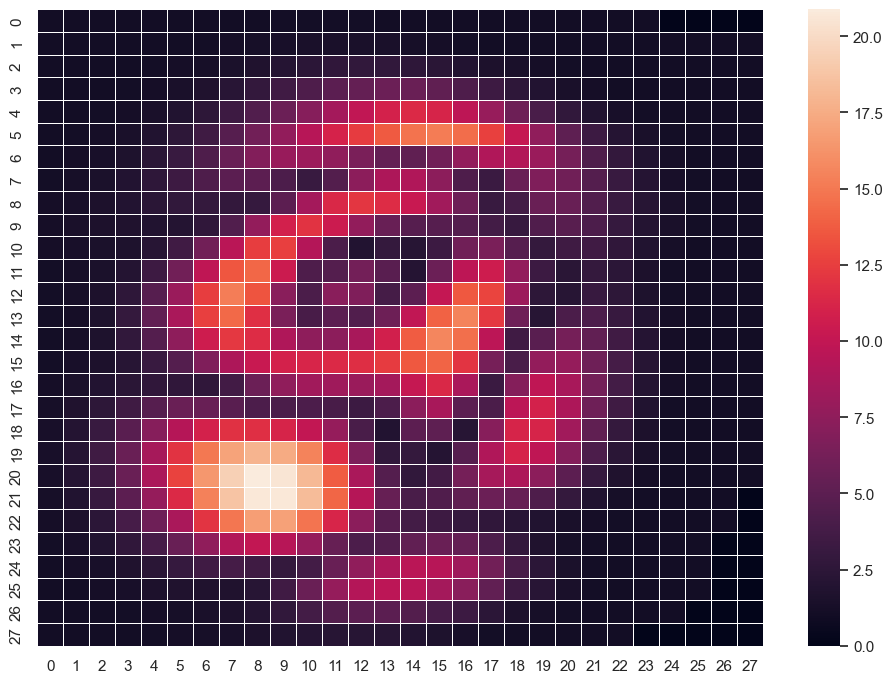

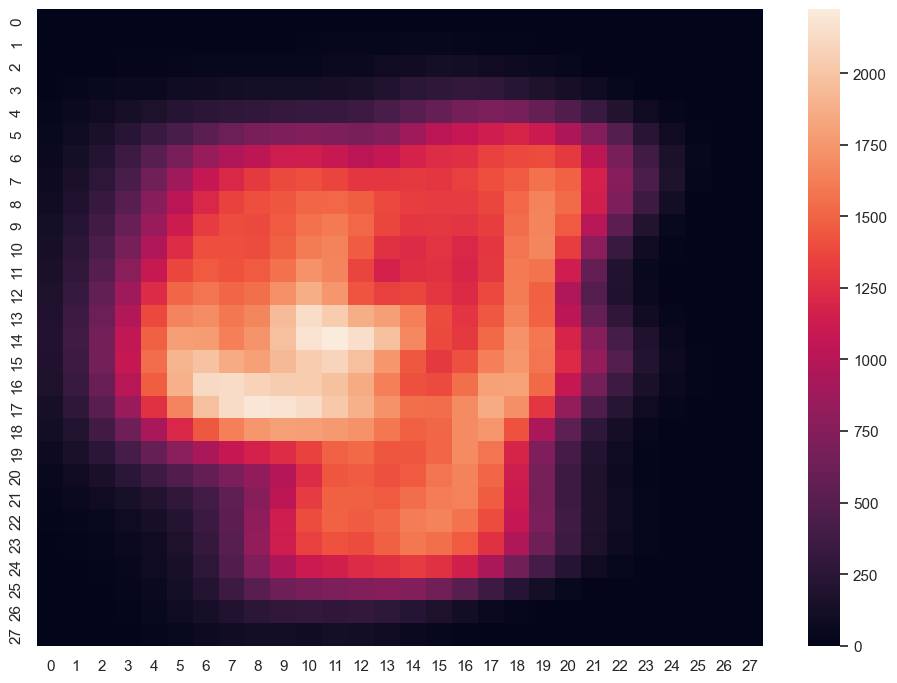

In [117]:
#Veo un numero arbitrario, por ejemplo el 4, veo su promedio y calculo desviacion estandar para saber que tanto se parecen entre si el conjunto de las imagenes que representan el numero 4
desviacionCuatro = np.zeros((28,28),float)
for k in range(0,len(data_chrs)):
            if data_chrs[k].item() == 4:
                for i in range(0,28):
                    for j in range(0,28):
                        desviacionCuatro[i][j] += np.sqrt((pow((data_imgs[k,:,:,0][i][j])-(promedios[4])[i][j],2))/contador[4])

ax = sns.heatmap(desviacion , linewidth=0.5)
plt.show()
ax = sns.heatmap(desviacionCuatro)
plt.show()


## 1) Seleccionó solo los números pedidos

In [3]:
dataImgs = [] #uso reshape para tener todas las matrices como un array
for i in range(0, len(data_chrs)):
    dataImgs.append(data_imgs[i, :, :, 0].reshape(-1))

dataImgs = np.asarray(dataImgs)

imgs = []
chrs = []
for i in range(0, len(data_chrs)): #Filtro los numeros a analizar
    if data_chrs[i].item() in {1, 2, 3, 4, 9}:
        imgs.append(data_imgs[i, :, :, 0].reshape(-1))
        chrs.append(data_chrs[i].item())
imgs = np.asarray(imgs)
chrs = np.asarray(chrs)

## 2) Exploro el rendimiento con distintas profundidades maximas

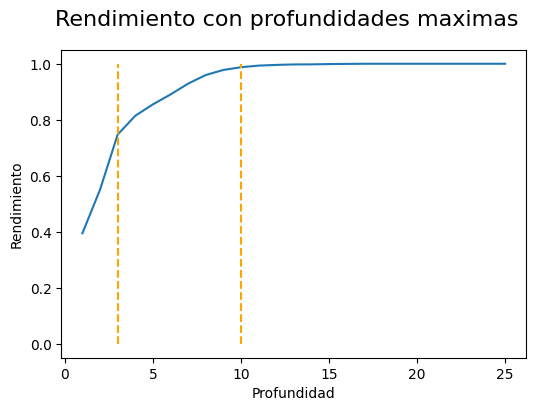

In [10]:
X_dev, X_holdOut, y_dev, y_holdOut = train_test_split(imgs, chrs, test_size=0.3) #separo en dev y holdout
accuracy = []
for i in range(1, 26):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_dev, y_dev) #Entrena
    y_pred = clf.predict(X_dev) #Prediccion
    accuracy.append((accuracy_score(y_dev, y_pred))) #Veo la prediccion contra el valor real
    
data = pd.DataFrame({'max_depth':range(1,26),'accuracy':accuracy})
plt.rcParams["figure.figsize"] = (6,4)
fig, axes = plt.subplots()
fig.suptitle('Rendimiento con profundidades maximas', fontsize=16)
data.plot(kind='line',x ='max_depth',y ='accuracy',xlabel='Profundidad',ylabel='Rendimiento',legend = False, ax = axes)
plt.plot((3, 3), (0, 1.0001), linestyle='--', color='orange')
plt.plot((10, 10), (0, 1.0001), linestyle='--', color='orange');

El gráfico muestra cómo el rendimiento mejora rápidamente entre las profundidades maximas 1 y 3, con una pendiente pronunciada en este tramo. Entre las profundidades 3 y 10 la tasa de mejora disminuye gradualmente, y a partir de la profundidad 10, las ganancias en rendimiento son mínimas.

## 3) Exploro hiperparametros y comparo con K-Folding

Vamos a usar profundidad máxima 10 por lo explorado anteriormente, y un K-Fold con 5 separaciones, donde vamos a explorar diferentes combinaciones de hiperparámetros y analizar cuál tiene mejor rendimiento.

In [132]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

dtcGini = DecisionTreeClassifier(criterion='gini', random_state=42)
dtcEntr = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtcLog = DecisionTreeClassifier(criterion='log_loss', random_state=42)
dtcRand = DecisionTreeClassifier(splitter='random', random_state=42)
dtcLog2 = DecisionTreeClassifier(max_features='log2', random_state=42)
dtcBalanced = DecisionTreeClassifier(criterion='entropy',class_weight='balanced')

scoresGini = cross_val_score(dtcGini, X_dev, y_dev, cv=kf)
scoresEntr = cross_val_score(dtcEntr, X_dev, y_dev, cv=kf)
scoresLog = cross_val_score(dtcLog, X_dev, y_dev, cv=kf)
scoresRand = cross_val_score(dtcRand, X_dev, y_dev, cv=kf)
scoresLog2 = cross_val_score(dtcLog2, X_dev, y_dev, cv=kf)
scoresBalanced =cross_val_score(dtcBalanced, X_dev, y_dev, cv=kf)

table = pd.DataFrame({'Gini':scoresGini,'Entropy':scoresEntr,'Log':scoresLog,'Random':scoresRand,'Log2':scoresLog2,'Balanced':scoresBalanced})
table = table.mean(axis = 0)
table

Gini        0.851535
Entropy     0.868128
Log         0.868128
Random      0.847942
Log2        0.793761
Balanced    0.861485
dtype: float64

Puedo ver que todos tienen un rendimiento similar, los mejores siendo 'Log_loss','Entropy' y 'Balanced',pero me voy a quedar con 'log_loss' para el entrenamiento del modelo final

### - Exploro posibles valores para min_samples_split y min_samples_leaf

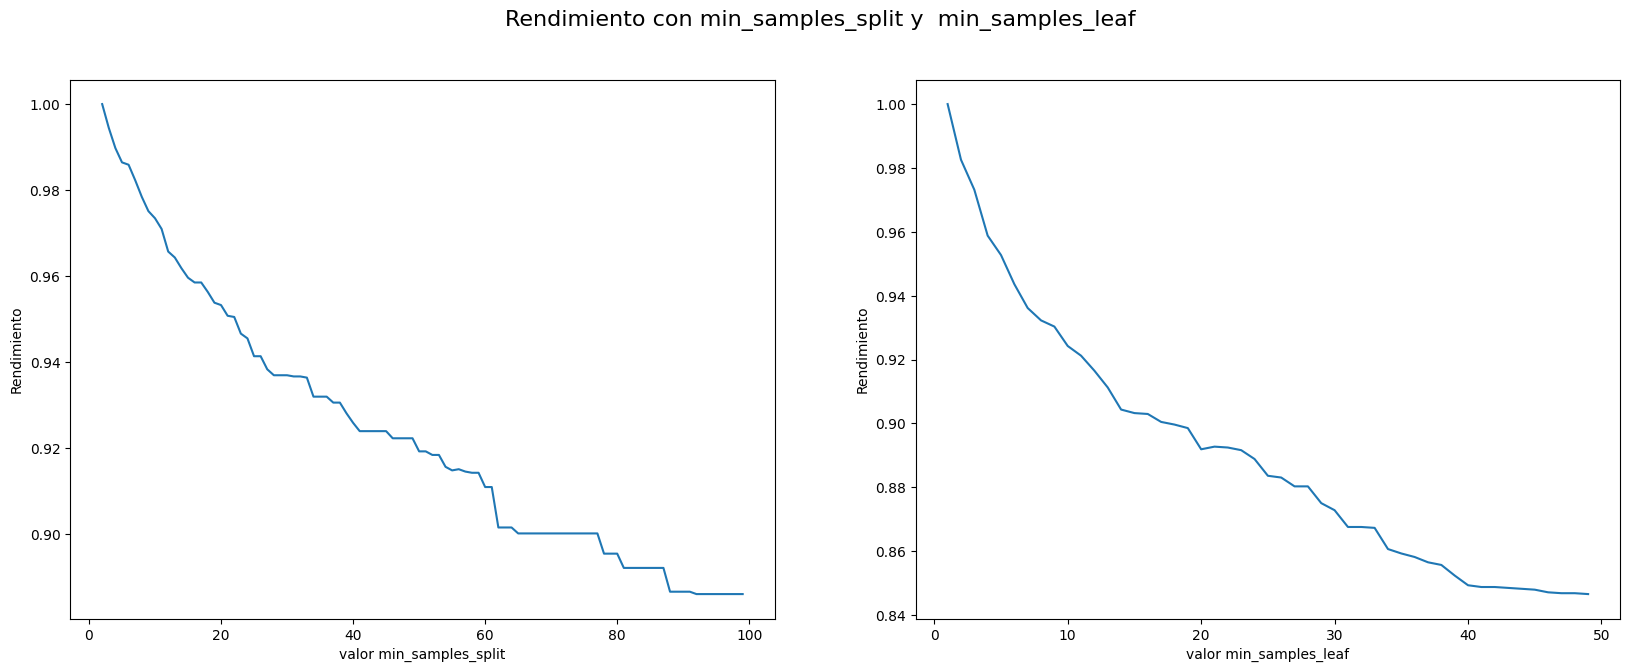

In [43]:
trainingSplit = []
for i in range(2, 100):
    clf = DecisionTreeClassifier(min_samples_split= i,random_state=42)
    clf.fit(X_dev, y_dev)
    y_pred = clf.predict(X_dev)
    trainingSplit.append((accuracy_score(y_dev, y_pred)))
dataSplit = pd.DataFrame({'minSplit':range(2,100),'accuracy':trainingSplit})

trainingLeaf = []
for i in range(1, 50):
    clf = DecisionTreeClassifier(min_samples_leaf= i,random_state=42)
    clf.fit(X_dev, y_dev)
    y_pred = clf.predict(X_dev)
    trainingLeaf.append((accuracy_score(y_dev, y_pred)))
dataLeaf = pd.DataFrame({'minLeaf':range(1,50),'accuracy':trainingLeaf})

plt.rcParams["figure.figsize"] = (20,7)
fig, axes = plt.subplots(1,2)
fig.suptitle('Rendimiento con min_samples_split y  min_samples_leaf', fontsize=16)
dataSplit.plot(kind='line',x ='minSplit',y ='accuracy',xlabel='valor min_samples_split',ylabel='Rendimiento',legend = False, ax = axes[0])
dataLeaf.plot(kind='line',x ='minLeaf',y ='accuracy',xlabel='valor min_samples_leaf',ylabel='Rendimiento',legend = False, ax = axes[1]);

Se aprecia como definir un min_samples_leaf y min_samples_split lo unico que hace es bajar el rendimiento, ademas por lo explorado anteriormente podemos llegar a la conclusion que el unico hiperparametro que nos importa es max_depth.

## 4) Entrenamos el modelo y lo evaluamos

In [44]:
clf = DecisionTreeClassifier(criterion='log_loss',max_depth = 10,random_state=42)
clf.fit(X_dev, y_dev)
y_pred = clf.predict(X_holdOut)

#### - Evaluamos max depth con Hold-Out para validar:

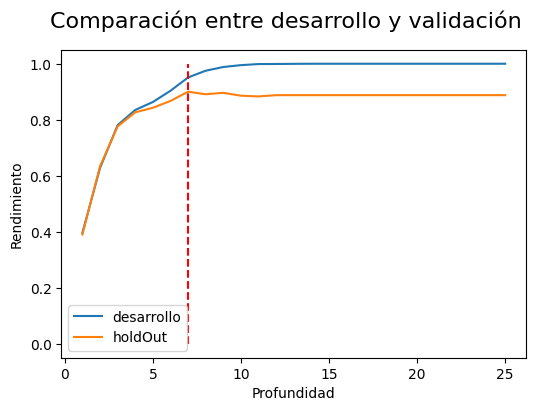

In [17]:
training = []
holdOut = []
for i in range(1, 26):
    clf = DecisionTreeClassifier(criterion='log_loss',max_depth=i,random_state=42)
    clf.fit(X_dev, y_dev)
    y_pred = clf.predict(X_dev)
    y_predHoldOut = clf.predict(X_holdOut)
    training.append((accuracy_score(y_dev, y_pred)))
    holdOut.append((accuracy_score(y_holdOut, y_predHoldOut)))
data = pd.DataFrame({'max_depth':range(1,26),'desarrollo':training,'holdOut':holdOut})
fig, axes = plt.subplots()
fig.suptitle('Comparación entre desarrollo y validación', fontsize=16)
data.plot(kind='line',x ='max_depth',y =['desarrollo','holdOut'],xlabel='Profundidad',ylabel='Rendimiento', ax = axes)
plt.plot((7, 7), (0, 1.0001), linestyle='--', color='red')

Se observa que con el conjunto hold-out, el modelo mejora su rendimiento hasta alcanzar un limite con una profundidad máxima de 7.

- visualizamos en una matriz de confusion cuales numeros se confunden mas en nuestro modelo:

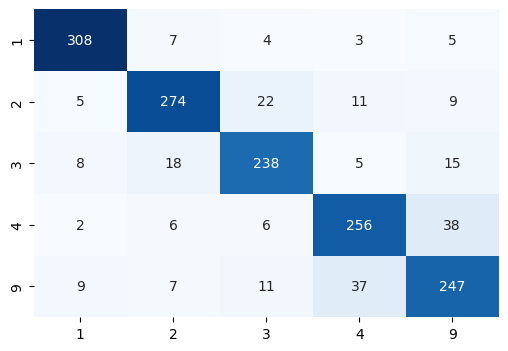

In [88]:
y_pred = clf.predict(X_holdOut)
cf_matrix = confusion_matrix(y_holdOut, y_pred)
sns.heatmap(cf_matrix,xticklabels=[1,2,3,4,9],yticklabels=[1,2,3,4,9], annot=True, fmt='d', cmap='Blues', cbar=False);

En la matriz de confusión, se observa que las clases correspondientes a los números 3 y 4 presentan una mayor tasa de confusión entre sí, indicando que el modelo tiende a clasificarlos incorrectamente el uno como el otro. De manera similar, las clases de los números 9 y 4 también muestran una confusión considerable, lo cual sugiere que estos dígitos comparten características que dificultan su distinción para el modelo.